# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Eza adila]
- **Email:** [climbingboys01@gmail.com]
- **ID Dicoding:** [eza_adila_YZ1N]

## Menentukan Pertanyaan Bisnis

- Apakah ada hubungan antara kondisi cuaca dan tingkat penggunaan sepeda?
	- Tujuan: Mengetahui bagaimana faktor cuaca (suhu, kelembaban, kecepatan angin) mempengaruhi jumlah penyewaan sepeda.
	- Manfaat: Dapat digunakan untuk prediksi permintaan sepeda pada kondisi cuaca tertentu.
- Bagaimana pola penggunaan sepeda berdasarkan hari?
	- Tujuan: Mengidentifikasi tren penggunaan sepeda sepanjang hari, hari dalam seminggu, dan musim dalam setahun.
	- Manfaat: Dapat membantu dalam pengelolaan stok sepeda di berbagai waktu dan musim.


## Import Semua Packages/Library yang Digunakan

In [20]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

In [21]:
data_hari = pd.read_csv('Data/data_1.csv')

data_jam = pd.read_csv('Data/data_2.csv')

# Menggabungkan ke-2 data
data_gabungan = pd.merge(data_jam, data_hari, on='dteday', suffixes=('_hour', '_day'))

**Insight:**
- membaca dataset hari pada data_1.csv
- membaca dataset jam pada data_2.csv
- menggabungkan data menggunakan merge

### Assessing Data

In [22]:
# Cek missing values
print("Missing Values in data:")
print(data_gabungan.isna().sum())

# Cek duplikasi
print("\nJumlah duplikasi pada data", data_gabungan.duplicated().sum())

Missing Values in data:
instant_hour       0
dteday             0
season_hour        0
yr_hour            0
mnth_hour          0
hr                 0
holiday_hour       0
weekday_hour       0
workingday_hour    0
weathersit_hour    0
temp_hour          0
atemp_hour         0
hum_hour           0
windspeed_hour     0
casual_hour        0
registered_hour    0
cnt_hour           0
instant_day        0
season_day         0
yr_day             0
mnth_day           0
holiday_day        0
weekday_day        0
workingday_day     0
weathersit_day     0
temp_day           0
atemp_day          0
hum_day            0
windspeed_day      0
casual_day         0
registered_day     0
cnt_day            0
dtype: int64

Jumlah duplikasi pada data 0


In [23]:
# Cek menggunkan parameter statik
print("\nInfo data")
data_gabungan.info()
print(data_gabungan.head(5))
print(data_gabungan.dtypes)


Info data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant_hour     17379 non-null  int64  
 1   dteday           17379 non-null  object 
 2   season_hour      17379 non-null  int64  
 3   yr_hour          17379 non-null  int64  
 4   mnth_hour        17379 non-null  int64  
 5   hr               17379 non-null  int64  
 6   holiday_hour     17379 non-null  int64  
 7   weekday_hour     17379 non-null  int64  
 8   workingday_hour  17379 non-null  int64  
 9   weathersit_hour  17379 non-null  int64  
 10  temp_hour        17379 non-null  float64
 11  atemp_hour       17379 non-null  float64
 12  hum_hour         17379 non-null  float64
 13  windspeed_hour   17379 non-null  float64
 14  casual_hour      17379 non-null  int64  
 15  registered_hour  17379 non-null  int64  
 16  cnt_hour         17379 non-null  int64  
 17  i

**Insight:**
- menganalisis kesalahan pada data dengan melakukan
- info dataset
- mengecek missing value
- mengecek duplikasi
- pada data ini metode mengecek iqr tidak dapat dilakukan dikarenakan dataframe mengandung nilai "object" yang akan di ubah menjadi "datetime"


### Cleaning Data

In [24]:
# Mengisi missing value hanya untuk kolom numerik
data_gabungan[data_gabungan.select_dtypes(include=['number']).columns] = \
    data_gabungan.select_dtypes(include=['number']).apply(lambda x: x.fillna(x.mean()))

# Mengisi missing value pada kolom datetime dengan interpolasi
data_gabungan[data_gabungan.select_dtypes(include=['datetime']).columns] = \
    data_gabungan.select_dtypes(include=['datetime']).apply(lambda x: x.interpolate())

# menghapus duplikasi data
data_gabungan.drop_duplicates()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [25]:
# mengecek niali outliner dan mengganti nilai outliner
import logging

# Konfigurasi logging
logging.basicConfig(filename='iqr_check.log', level=logging.ERROR, 
                    format='%(asctime)s - %(levelname)s - %(message)s')

try:
    # Mengubah semua tipe data menjadi numerik (jika tidak bisa, jadi NaN)
    data_gabungan = data_gabungan.apply(pd.to_numeric, errors='coerce')

    # Pastikan hanya kolom numerik yang diproses
    numeric_cols = data_gabungan.select_dtypes(include=['number'])

    # Inisialisasi dictionary untuk menyimpan batas IQR tiap kolom
    iqr_limits = {}

    for col in numeric_cols.columns:
        q25, q75 = np.percentile(numeric_cols[col].dropna(), 25), np.percentile(numeric_cols[col].dropna(), 75)
        iqr = q75 - q25
        cut_off = iqr * 1.5
        minimum, maximum = q25 - cut_off, q75 + cut_off

        # Simpan batas IQR
        iqr_limits[col] = (minimum, maximum)

        # Hitung mean tanpa outlier
        mean_value = numeric_cols[(numeric_cols[col] >= minimum) & (numeric_cols[col] <= maximum)][col].mean()

        # Ganti outlier dengan mean
        data_gabungan[col] = data_gabungan[col].apply(lambda x: mean_value if x < minimum or x > maximum else x)

except Exception as e:
    logging.error(f"Error saat menjalankan IQR check dan mengganti outlier: {e}")

In [26]:
# mengubah object pada data  dteday menjadi datetime
data_gabungan['dteday'] = pd.to_datetime(data_gabungan['dteday'], errors='coerce')

# Cek menggunkan parameter statik
print("\nInfo data")
data_gabungan.info()
print(data_gabungan.head(5))
print(data_gabungan.dtypes)


Info data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant_hour     17379 non-null  int64         
 1   dteday           0 non-null      datetime64[ns]
 2   season_hour      17379 non-null  int64         
 3   yr_hour          17379 non-null  int64         
 4   mnth_hour        17379 non-null  int64         
 5   hr               17379 non-null  int64         
 6   holiday_hour     17379 non-null  int64         
 7   weekday_hour     17379 non-null  int64         
 8   workingday_hour  17379 non-null  int64         
 9   weathersit_hour  17379 non-null  int64         
 10  temp_hour        17379 non-null  float64       
 11  atemp_hour       17379 non-null  float64       
 12  hum_hour         17379 non-null  float64       
 13  windspeed_hour   17379 non-null  float64       
 14  casual_hour      17379 non-

**Insight:**
- mengisi missing value dengan nilai mean kecuali 
- missing value yang terjadi pada type data datetime di isi dengan interpolate()
- menghapus duplikasi pada data
- mengecek nilai outliner dengan mengubah seluruh niai menjadi numeric
- mengisi outliner menggunakan nilai mean
- mengubah type data pada dteday menjadi datetime
- melakukan cek ulang data

## Exploratory Data Analysis (EDA)

### Explore ...

In [27]:
# membaca data yang sudah di bersihkan
data_gabungan.describe()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
count,17379.0000,0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,NaT,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
min,1.0000,NaT,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,NaT,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,NaT,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,NaT,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000
max,17379.0000,NaT,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,...,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947


In [28]:
# membaca data berdasarkan suhu
data_gabungan.groupby(by='temp_day').agg({
	'cnt_day':['min', 'max', 'mean'],
	'cnt_hour':['min','max', 'mean']
})

cnt_day               cnt_hour                 
             min   max    mean      min  max        mean
temp_day                                                
0.059130     981   981   981.0        2  103   42.652174
0.096522     986   986   986.0        1  116   42.869565
0.097391    1416  1416  1416.0        1  184   61.565217
0.107500    2368  2368  2368.0        1  315   98.666667
0.127500    1529  1529  1529.0        1  164   63.708333
...          ...   ...     ...      ...  ...         ...
0.834167    5463  5463  5463.0        8  624  227.625000
0.838333    3846  3846  3846.0        6  421  160.250000
0.848333    3387  3387  3387.0        7  322  141.125000
0.849167    3285  3285  3285.0        7  245  136.875000
0.861667    4840  4840  4840.0       14  367  201.666667

[499 rows x 6 columns]

In [30]:
# membaca data berdasarkan kecepatan angin
data_gabungan.groupby(by='windspeed_day').agg({
	'cnt_day':['min', 'max', 'mean'],
	'cnt_hour':['min','max', 'mean']
})

cnt_day               cnt_hour                 
                  min   max    mean      min  max        mean
windspeed_day                                                
0.022392         4985  4985  4985.0        5  563  207.708333
0.042304         5117  5117  5117.0        6  473  213.208333
0.045404         5409  5409  5409.0        8  496  225.375000
0.045408         1712  1712  1712.0        1  230   71.333333
0.046650         5087  5087  5087.0        5  638  211.958333
...               ...   ...     ...      ...  ...         ...
0.417908         1913  1913  1913.0        2  256   79.708333
0.421642         2732  2732  2732.0        2  258  113.833333
0.422275         4195  4195  4195.0        1  494  174.791667
0.441563         5382  5382  5382.0        2  597  224.250000
0.507463         1635  1635  1635.0        3  196   68.125000

[650 rows x 6 columns]

**Insight:**
- Membaca data sebelum melakukan visualisasi
- Mengelompokan data menjadi 3 kategori
- berdasarkan suhu
- berdasarkan kelembaban
- berdasarkan kecepatan angin

## Visualization & Explanatory Analysis

### Pertanyaan 1: 
- Apakah ada hubungan antara kondisi cuaca dan tingkat penggunaan sepeda?
- Bike Sharing Dataset

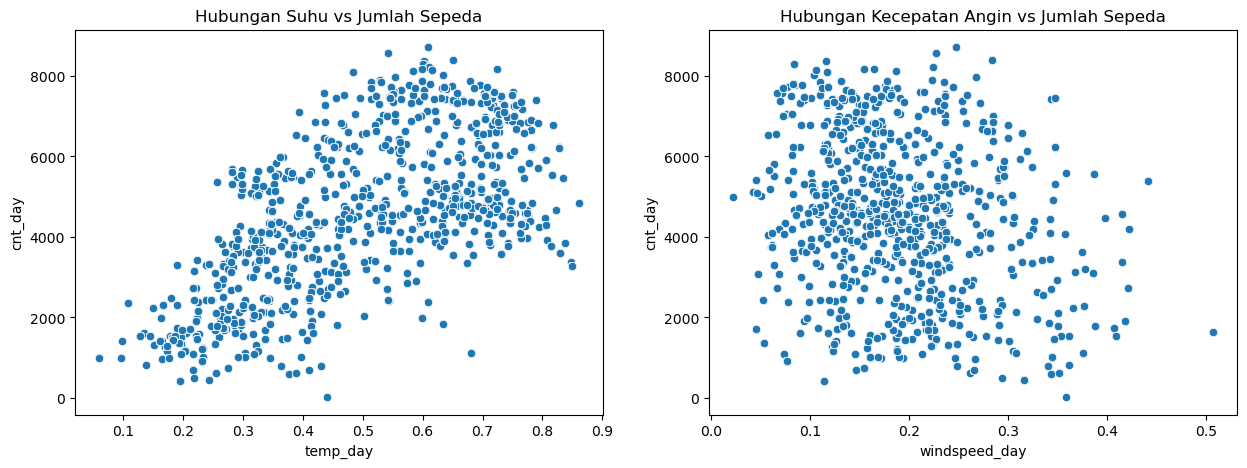

In [39]:
plt.figure(figsize=(15, 5))

# suhu vs jumlah penyewa speda
plt.subplot(1, 2, 1)
sns.scatterplot(x=data_gabungan['temp_day'], y=data_gabungan['cnt_day'])
plt.title('Hubungan Suhu vs Jumlah Sepeda')

# kecepatan angin vs jumlah penyewa speda
plt.subplot(1, 2, 2)
sns.scatterplot(x=data_gabungan['windspeed_day'], y=data_gabungan['cnt_day'])
plt.title('Hubungan Kecepatan Angin vs Jumlah Sepeda')

plt.show()

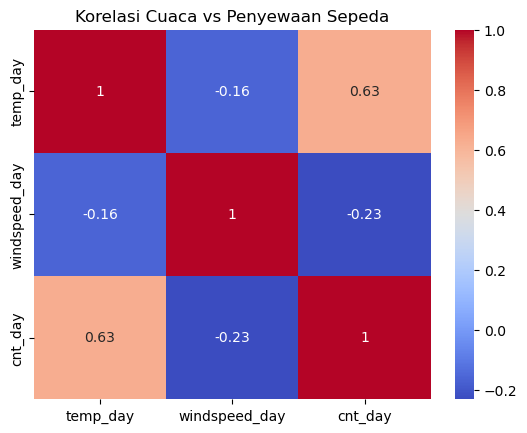

In [32]:
# hubungan cuaca dan jumlah penyewaan sepeda
correlation_matrix = data_gabungan[['temp_day', 'windspeed_day', 'cnt_day']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Cuaca vs Penyewaan Sepeda')
plt.show()

### Pertanyaan 2:
- Bagaimana pola penggunaan sepeda berdasarkan hari?
- Bike Sharing Dataset

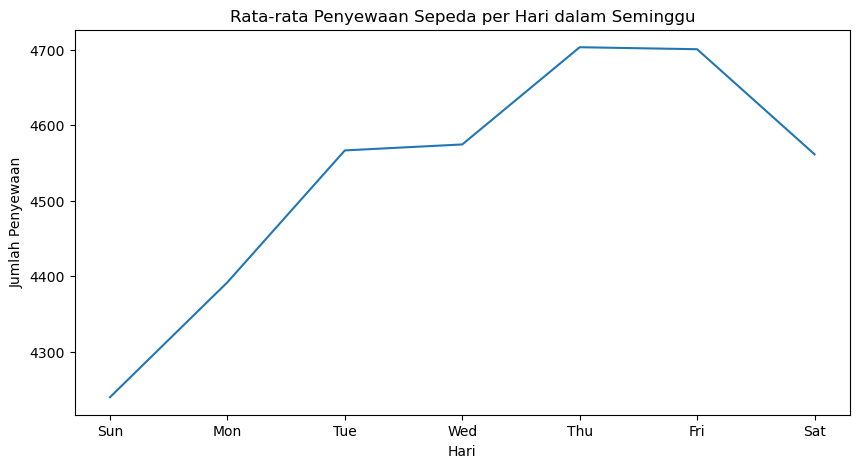

In [33]:
# line plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=data_gabungan['weekday_day'], y=data_gabungan['cnt_day'], estimator='mean', errorbar=None)
plt.xticks(ticks=range(7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.title('Rata-rata Penyewaan Sepeda per Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan')
plt.show()

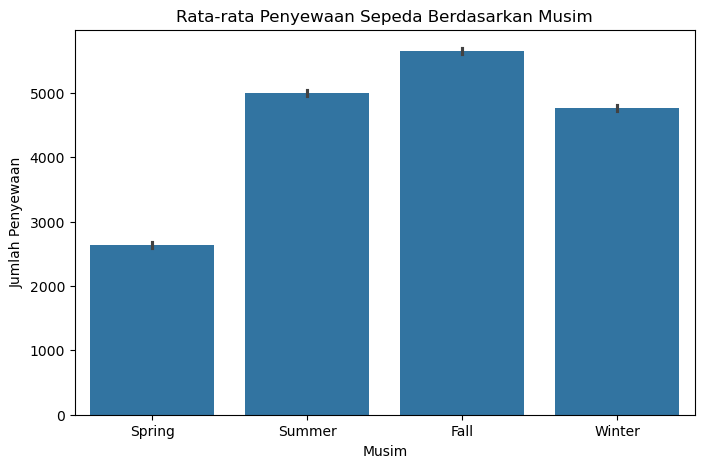

In [34]:
# barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=data_gabungan['season_hour'], y=data_gabungan['cnt_day'])
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

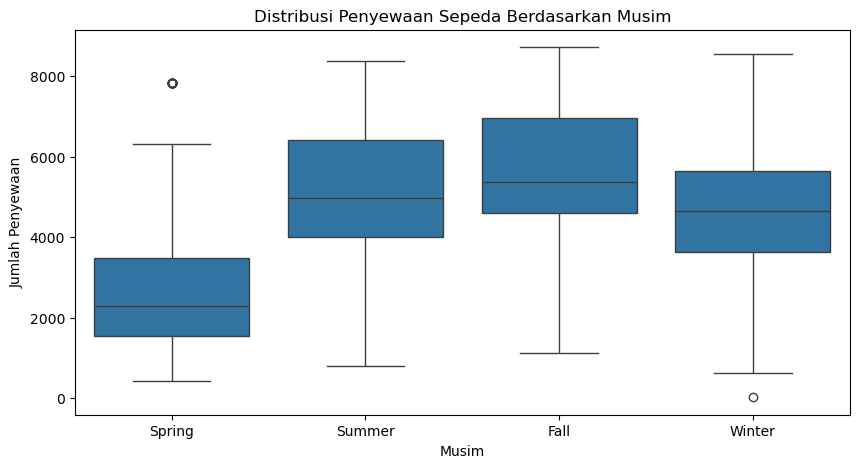

In [35]:
# boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_gabungan['season_hour'], y=data_gabungan['cnt_day'])
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight:**
-  Menganalisi hubungan antara kondisi cuaca dan tingkat penggunaan speda
- Menganalisi pola penggunaan speda berdasarkan hari

## Analisis Lanjutan (Opsional)
- clustering dengan 
- metode binning

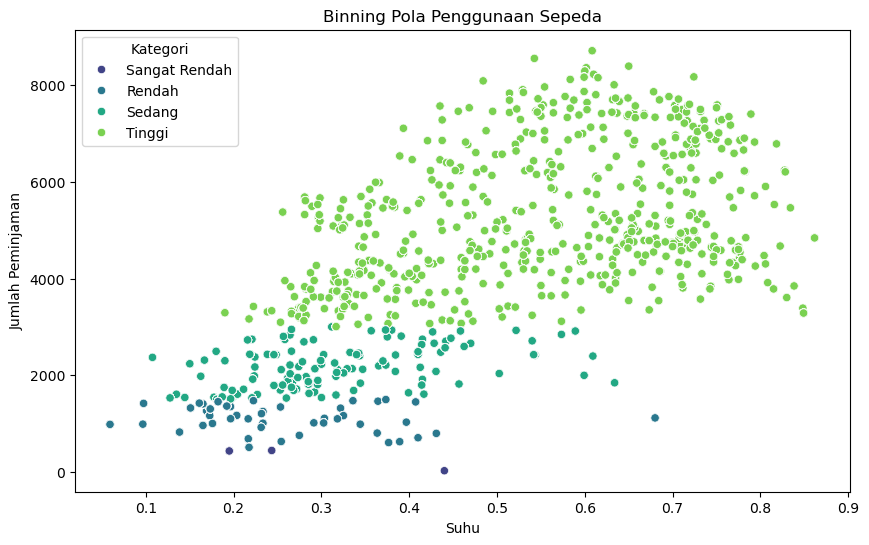

In [36]:
# Fitur yang digunakan
features = ['temp_day', 'hum_day', 'windspeed_day', 'cnt_day']
data = data_gabungan[features]

# Membuat bin untuk 'cnt_day' berdasarkan rentang nilai (equal-width binning)
bins = [data['cnt_day'].min(), 500, 1500, 3000, data['cnt_day'].max()]
labels = ['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi']

data_gabungan['cluster'] = pd.cut(data['cnt_day'], bins=bins, labels=labels, include_lowest=True)

# Visualisasi hasil binning (berdasarkan suhu)
plt.figure(figsize=(10,6))
sns.scatterplot(x=data_gabungan['temp_day'], y=data_gabungan['cnt_day'], hue=data_gabungan['cluster'], palette='viridis')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Peminjaman')
plt.title('Binning Pola Penggunaan Sepeda')
plt.legend(title='Kategori')
plt.show()

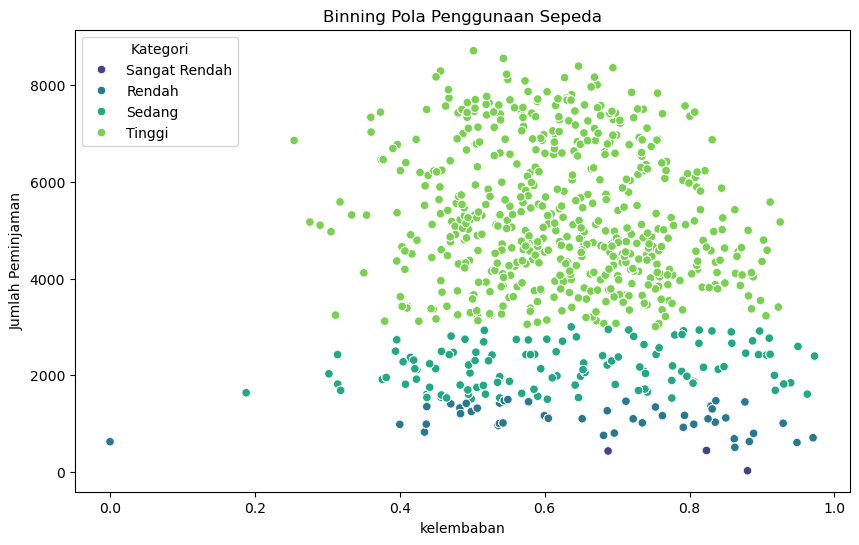

In [37]:
# Visualisasi hasil binning (berdasarkan kelembaban)
plt.figure(figsize=(10,6))
sns.scatterplot(x=data_gabungan['hum_day'], y=data_gabungan['cnt_day'], hue=data_gabungan['cluster'], palette='viridis')
plt.xlabel('kelembaban')
plt.ylabel('Jumlah Peminjaman')
plt.title('Binning Pola Penggunaan Sepeda')
plt.legend(title='Kategori')
plt.show()

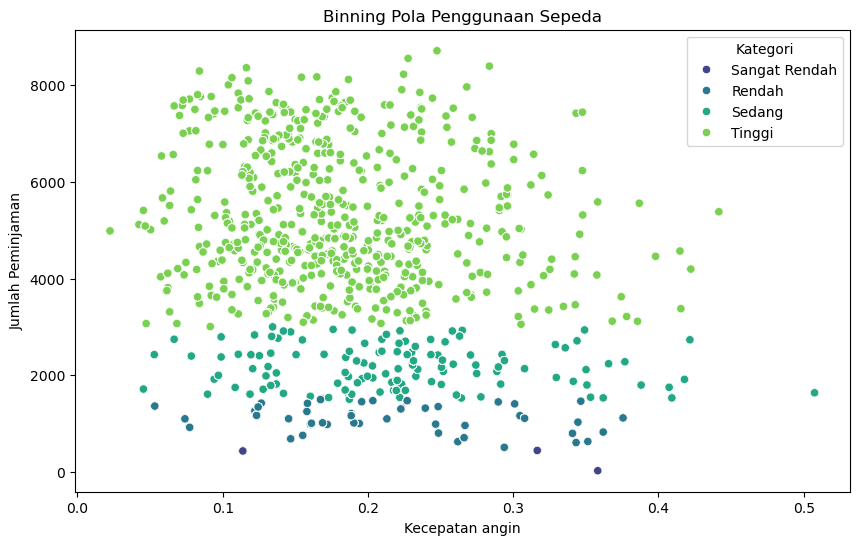

In [38]:
# Visualisasi hasil binning (berdasarkan kecepatan angin)
plt.figure(figsize=(10,6))
sns.scatterplot(x=data_gabungan['windspeed_day'], y=data_gabungan['cnt_day'], hue=data_gabungan['cluster'], palette='viridis')
plt.xlabel('Kecepatan angin')
plt.ylabel('Jumlah Peminjaman')
plt.title('Binning Pola Penggunaan Sepeda')
plt.legend(title='Kategori')
plt.show()

## Conclusion

- Conclution pertanyaan 1
	- Suhu adalah faktor terpenting dalam peningkatan jumlah sewa sepeda
	- Kelembaban dan kecepatan angin memiliki dampak yang kecil,
	- berdasarkan analisis yang sudah kita lakukan dapat di lihat bahwa ada beberapa pola peningkatan jumlah sewa
	sihingga dapat di tarik beberapa kesimpulan sebagai berikut
		- peningkatan suhu sangat mempengaruhi jumlah penyewaan sehingga sebaiknya kita meningkat-kan ketersediaan sepeda ketika terjadi peningkatan suhu
		- kecepatan aingin yang rendah cenderung mempengaruhi jumlah penyewaan, jika terjadi penurunan kecepatan aingin sebaiknya kita meningkatkan ketersedian penyewaan sepeda
	- namun kita sebaiknya melihat analisis pertanyaan ke 2
- Conclution pertanyaan 2
	- penyewaan sepeda meningkat dari hari sabtu hingga jumat lalu turun di hari minggu
	- penyewaan sepeda terbanyak terjadi pada musim gugur dan di posisi ke-2 oleh musim panas, lalu musim dingin dan musim semi.
	- berdasarkan data dari simpulan ke-1 kita dapat membuat simpulan inti:
		- sebaiknya jumlah ketersediaan sewa di tingkatkan pada hari kamis, jum'at, dan sabtu, dikarenakan jumlah penyewaan sepeda biasanya meningkat khususnya pada hari jumat dan sabtu biasanya menjadi pusat peningkatan jumlah penyewaan.
		- dan pada musim-musim tertentu seperti musim gugur dan musim panas ketika cuaca sedang bersahabat dengan kecepatan angin rendah dan suhu tinggi, sebiknya kita meingkatkan jumlah ketersediaan sewa sepeda